### BP approximation in tensor network simulation

1. Belief propagation (BP): a message-passing algorithm for computing marginal probability distributions in probabilistic graphical model. Exact for tree graphs and approximate for general graph. Basically is just a list of message 'update'/passing equations. Since the calculation of messages on each nodes can be done in parallel, although mathematically BP messages seem to be fixed once the PGM is known, numerically to obtain the messages we need to update all of them iteratively until convergence.

2. Bethe free entropy/energy approximation: Consider the Gibbs free energy for a trial probability distribution $Q$ on a probabilistic graphical model $P=\frac{1}{Z}\prod_a f_a(X_a)$:
$$F(P,Q) = U(P,Q)-S(Q)$$
The Bethe free energy approximation is basically using the joint probability distribution for tree graphs $Q_{tree}$ to approximate the joint distribution $Q$ on general graphs:
$$F_{Bethe} = F_{tree} = U(P,Q_{tree})-S(Q_{tree})$$

3. On tree graphs, when using Lagrange multiplier method to variationally minimize the free energy, we can obtain that the minimized free energy recovers the BP message 'update' rules, and thus corresponds to the BP message fixed point in the iterative algorithm. \
In other words, BP fixed point message minimize the Bethe free energy, which coincides with Gibbs free energy on tree graphs. Thus the Bethe free entropy/energy approximation is equivalent to using BP to compute the fixed point messages, and express the statistical quantities in terms of these fixed point messages.

4. When we consider a tensor network with positive entries, we can view the value $T(\vec{x},\vec{r})$ of the TN corresponding to one specific configuration $(\vec{x},\vec{r})$ as an unnormalized probability, and thus the contraction of the tensor network natually corresponds to the partition function of this probability distribution.
$$Z = tr(T(\vec{x},\vec{r}))$$
From statistical mechanics, we know the partition function of a probability distribution can be written in terms of free energy/free entropy:
$$Z=e^{F_s}=e^{-\beta F}$$
where $F_s$ is the free entropy and $F$ is the free energy of the prob. distribution.

Using Bethe free entropy approximation to the free entropy of the probability distribution of the tensor network, we can express the partition function in terms of local partition functions:
$$tr(T)=Z_{Bethe} = e^{F_{Bethe}} = \prod_i Z_{\partial i}(E_{\partial i})/\prod_{(i,j)\in edge} Z_{ij}(E_{i\to j},E_{j\to i})$$
where $E$ are the converged message/environment tensors.

### Algorithms:

1. Non-iterative algorithm for tree graphs: from bottom to top (or from youngest nodes to oldest nodes, from children to parents).
Step 1: find all vector nodes (youngest nodes in a tree)
Step 2: Propagate messages to older nodes. For vector nodes, the outgoing message is the vector itself.

2. Iterative algorithm for general graphs: iterate over each site. Pseudo code in iteration step $t$ :\
\
&ensp;for site $i$ in sites:\
&ensp;&ensp;for site $j$ in $\partial i$:\
&ensp;&ensp;&ensp;$m^{t+1}_{ij} = T^i \cdot \prod_{k\in \partial i \backslash j} m^{t}_{ki}$\
&ensp;&ensp;&ensp;$m^{t+1}_{ij} = m^{t+1}_{ij}/||m^{t+1}_{ij}||$   #normalize the message tensor

where multiplication between tensors is the usual tensor multiplication (index contraction). Repeat this process until convergence.



### Tensor Network representation of the partition function

#### Classical Ising model

Take classical Ising model on a general graph as an example:
$$H = -\sum_{(ij)\in E} J_{ij}s_is_j$$
$$Z = \sum_s \prod_{(ij)\in E} e^{\beta J_{ij}s_i s_j} = {\rm Tr}(A^{1}\times...A^{n})$$
where $s_i$ is the spin that takes value $\pm 1$, and $A^i$ is a 2x2 tensor that depends on the local field $h_i$ and the temperature $T$.
These tensors $A^i$ are defined on sites, but practically we can assign an energy factor 2x2 tensor to each bond $(ij)\in E$:
$$B^{ij}_{\alpha \beta} = e^{\beta s_i(\alpha)s_j(\beta)}$$
Then contraction of the resulting tensor network would give us the partition function $Z$.
Note that if we want to introduce geometry to the graph, then usually $J_{ij}$ is some function of $(i,j)$, for example, a decaying function of real space distance $r_{ij}$.



#### Lennard-Jones model

Consider the Lennard-Jones potential in continuum space:
$$V(r) = 4\varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]$$
In discrete grid space, we can approximate the potential by:
$$V(r_{ij}) = 4\varepsilon \left[ \left( \frac{\sigma}{r_{ij}} \right)^{12} - \left( \frac{\sigma}{r_{ij}} \right)^6 \right]$$

The static Hamiltonian (no kinetic terms) should be:
$$H(\{n_i\}) = \sum_{(ij)\in E} V(r_{ij})n_i n_j$$
where $n_i$ is the occupation number of site $i$ and takes value 0 or 1.
The partition function of the Lennerd-Jones model is:
$$Z = \sum_{\{n_i\}} \prod_{(ij)\in E} e^{-\beta V(r_{ij})n_i n_j}$$
This partition function can be represented by a hyper tensor network, with each site being a hyper index, and each bond being a 2x2 matrix that connects 2 sites. The contraction of this tensor network would yield the partition function $Z$.
The following figure shows the tensor network representation of the partition function of the Lennard-Jones model with nearest neighbor interaction on a 2D 10x10 square lattice.
![LJ](HTN_2DIsing.png)



If we consider a change of variable $n_i = \frac{1}{2}(1+s_i)$, then the Hamiltonian can be written as:
$$H(\{s_i\}) = \sum_{(ij)\in E} V(r_{ij})\frac{1}{4}(1+s_i)(1+s_j)$$
$$H(\{s_i\}) = \sum_{(ij)\in E} \frac{1}{4}V(r_{ij}) + \frac{1}{4}V(r_{ij})s_i + \frac{1}{4}V(r_{ij})s_j + \frac{1}{4}V(r_{ij})s_is_j$$
$$H(\{s_i\}) = const + \sum_{(ij)\in E} \frac{1}{2}V(r_{ij})s_i + \frac{1}{4}V(r_{ij})s_i s_j $$
If we introduce a cut-off distance $\Lambda$ for the interaction, then for each spin we can define an effective uniform magnetic field acting on local spins:
$$h = h_i = \sum_{j\in \partial i, r_{ij}\leq \Lambda} \frac{1}{2}V(r_{ij})$$
We can also denote the interaction between 2 spins as:
$$J_{ij} = \frac{1}{4}V(r_{ij})$$
Then the Hamiltonian can be written as:
$$H(\{s_i\}) = const + h\sum_{i} s_i + \sum_{(ij)\in E} J_{ij}s_i s_j$$
Therefore, in the TN representation of the partition function, the interaction matrix tensor on each bond $(i,j)$ is:
$$
A^{ij} =
\begin{pmatrix}
e^{\beta J_{ij}} & e^{-\beta J_{ij}} \\
e^{-\beta J_{ij}} & e^{\beta J_{ij}}
\end{pmatrix}
$$
The on-site field vector tensor is:
$$
B^{i} = [e^{-\beta h}, e^{\beta h}]
$$
We have assumed the basis vactor of the spin is $(-1,1)$.

V(r_ij) = 0.0


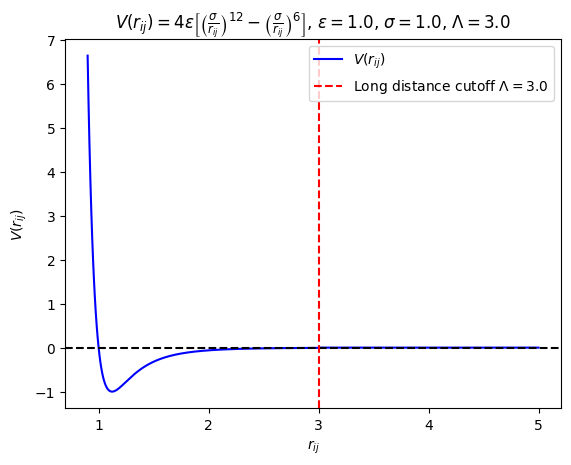

In [1]:
### Code tests.

import numpy as np
import matplotlib.pyplot as plt

def V(xi, xj, a0=1, epsilon=0.1, sigma=1.0, cutoff=5.0):
    # Compute the Euclidean distance r_ij between xi and xj
    r_ij = np.linalg.norm(np.array(xi) - np.array(xj))*np.sqrt(a0)
    
    # Check if r_ij is greater than the cutoff length lambda
    if r_ij > cutoff:
        return 0.0
    
    # Compute the potential V(r_ij)
    V_r_ij = 4 * epsilon * ((sigma / r_ij)**12 - (sigma / r_ij)**6)
    
    return V_r_ij

# Example usage
xi = [0.0, 0.0]
xj = [4.0, 0.0]
epsilon = 1.0
sigma = 1.0
cutoff = 3.0

result = V(xi, xj, 1, epsilon, sigma, cutoff)
print(f"V(r_ij) = {result}")

x_list = np.linspace(0.9, 5.0, num=500)
V_list = np.zeros_like(x_list)
for i in range(len(x_list)):
    V_list[i] = V(xi, [x_list[i], 0.0], a0=1,epsilon=epsilon, sigma=sigma, cutoff=cutoff)
#plot the potential
ax = plt.subplot(111)
ax.plot(x_list, V_list, color='b',label=r'$V(r_{ij})$')
# # plot the line r_ij==1.0 where the potential is zero
# ax.axvline(x=1.0, color="k", linestyle="--")
# plot the line r_ij==1.0 where the potential is zero
# ax.axvline(x=0.9, color="g", linestyle="--",label=r'Short distance cutoff $\Lambda=0.9$')
# plot horizontal line at V(r_ij)==0.0
ax.axhline(y=0.0, color="k", linestyle="--")
# plot the line r_ij==3.0 where the potential is zero
ax.axvline(x=3.0, color="r", linestyle="--",label=r'Long distance cutoff $\Lambda=3.0$')

ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$V(r_{ij})$")
ax.set_title(r'$V(r_{ij})=4\epsilon\left[\left(\frac{\sigma}{r_{ij}}\right)^{12}-\left(\frac{\sigma}{r_{ij}}\right)^{6}\right]$, $\epsilon=1.0$, $\sigma=1.0$, $\Lambda=3.0$')
ax.legend()
plt.savefig('./LJ_potential.pdf')
plt.show()

In [2]:
V(0, 2**(1/6), 1, epsilon, sigma, cutoff)

-1.0

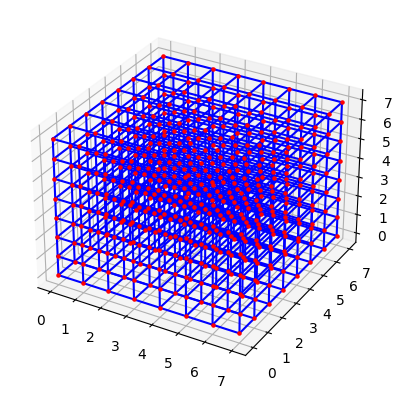

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_3d_lattice(N):
    G = nx.Graph()
    for x in range(N):
        for y in range(N):
            for z in range(N):
                node = (x, y, z)
                G.add_node(node)
                for dx, dy, dz in [(1, 0, 0), (0, 1, 0), (0, 0, 1)]:
                    neighbor = (x + dx, y + dy, z + dz)
                    if neighbor[0] < N and neighbor[1] < N and neighbor[2] < N:
                        G.add_edge(node, neighbor)
    return G

# Create a 3D lattice of size 4x4x4
N = 8
G = create_3d_lattice(N)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for edge in G.edges():
    x0, y0, z0 = edge[0]
    x1, y1, z1 = edge[1]
    ax.plot([x0, x1], [y0, y1], [z0, z1], color='b')

for node in G.nodes():
    x, y, z = node
    ax.scatter(x, y, z, color='r', marker='.')

# plt.title(f"3D Cubic Lattice of size {N}x{N}x{N}")
plt.savefig("./3d_lattice.pdf")


### Time cost of constructing the 3D partition function TN

By simple approximation, we compute the number of edges in the TN:
\begin{equation}
N_e \approx \frac{{N_a}^3}{a^3}\cdot V
\end{equation}
where $a=L/N_a$ is the lattice spacing, and $V=\frac{2}{3}\pi \Lambda^3$ is the volume of the interaction block ($\Lambda$ is the cutoff radius).

We approximate the time cost to be proportional to the number of edges in the TN, and the proportionality constant is determined by the time cost of constructing a single edge.
\begin{equation}
C_{TN} = C_{edge} \cdot N_e
\end{equation}
The time cost has expression:
\begin{equation}
C_{TN} \approx C_{edge} \cdot \frac{L^3}{a^6}\cdot V = C_{edge} \cdot \frac{{N_a}^6}{L^3} \cdot V = C_{edge} \cdot \frac{{N_a}^3}{a^3} \cdot V
\end{equation}
When we fix the system size $L$, the time cost is proportional to $N_a^6$ (or $a^{-6}$). When fixing the lattice spacing $a$, the time cost is proportional to $L^3$.



### BP inaccuracy when reaching the continuum limit

BP tends to overestimate the density of the system when lattice spacing is small. By doing sliced-BP on some fixed lattice sites, we find that BP in this case tends to underestimate the density. By looking at each matrix element carefully, I found that when there is no fixed indices, the BP message passing through Boltzman matrix tend to amplify the attractive interaction while suppresing the effect of repulsive interaction. This is mainly due to the nature of exponential function
$$e^{x}$$
in the Boltzman distribution. When $x$ is large, it goes to infinity fast, while when $x$ is small, it simply drops to a finite value $0$. The two different limit behaviors of the exponential function causes bias in message passing in the Lennard-Jones model. However physically, the repulsive interaction should be the most important factor that controls the density of the system when going to the continuum limit. This is contray to the nature of BP message passing algorithm (given the specific form of Boltzman matrix).